In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
import nltk
import numpy as np

# Download NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.shape

(50000, 2)

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# Function for text preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers using regular expressions
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Perform stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(text)])
    return text

In [7]:
# Function to plot learning curves
def plot_learning_curves(model, X_train, y_train, X_val, y_val, epochs):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Train the model
        model.fit(X_train, y_train)

        # Calculate loss on training and validation sets
        train_loss = 1 - model.score(X_train, y_train)
        val_loss = 1 - model.score(X_val, y_val)

        # Append losses to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(np.arange(1, epochs + 1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
# Preprocess the data
df['review'] = df['review'].apply(preprocess_text)

<ipython-input-6-de45c70e4e48>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [9]:
# Encode the labels (positive and negative) to numerical values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [10]:
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,1
1,a wonder littl product the film techniqu is ve...,1
2,i thought thi wa a wonder way to spend time on...,1
3,basic there a famili where a littl boy jake th...,0
4,petter mattei love in the time of money is a v...,1


In [11]:
# Split the data into training, validation, and testing sets
X_text_train, X_text_temp, y_train, y_temp = train_test_split(
    df['review'], df['sentiment'], test_size=0.3, random_state=42
)
X_text_val, X_text_test, y_val, y_test = train_test_split(
    X_text_temp, y_temp, test_size=0.5, random_state=42
)

In [12]:
# Vectorize the text using TF-IDF
max_words = 10000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words, stop_words='english')

In [13]:
# Fit and transform on training data
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)

In [14]:
# Transform the validation and test data
X_text_val_tfidf = tfidf_vectorizer.transform(X_text_val)
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

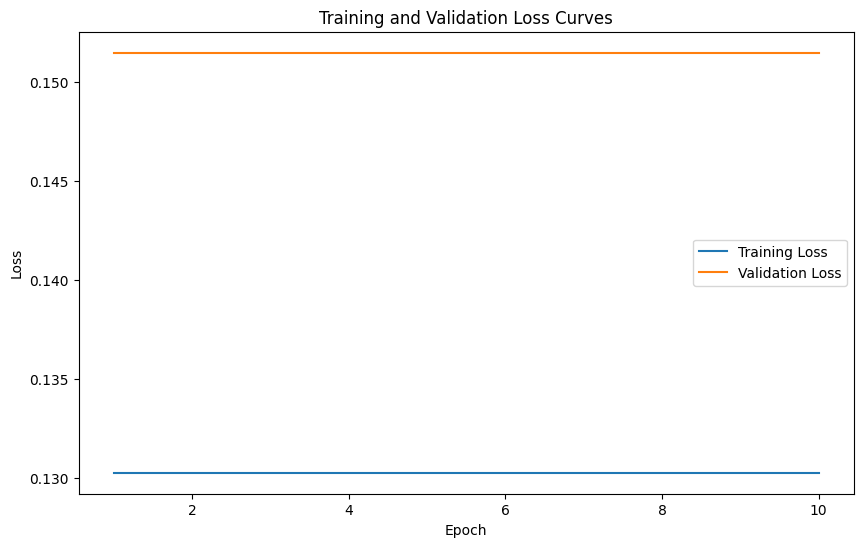

Multinomial Naive Bayes Accuracy: 0.8485333333333334
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      3689
           1       0.85      0.85      0.85      3811

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500

Multinomial Naive Bayes Confusion Matrix:


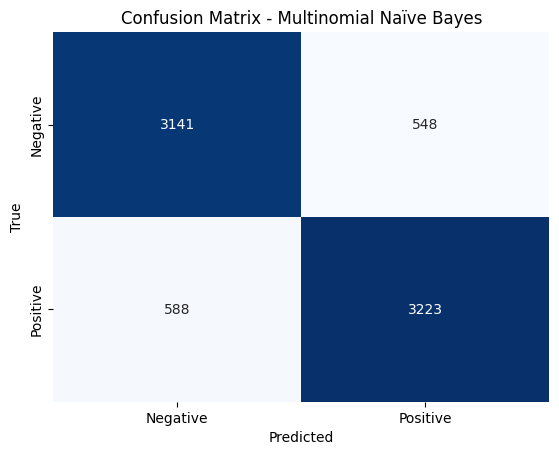

In [15]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
plot_learning_curves(nb_model, X_text_train_tfidf, y_train, X_text_val_tfidf, y_val, epochs=10)
nb_model.fit(X_text_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_text_val_tfidf)
nb_accuracy = accuracy_score(y_val, nb_predictions)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_val, nb_predictions))
print("Multinomial Naive Bayes Confusion Matrix:")
nb_conf_matrix = confusion_matrix(y_val, nb_predictions)
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Multinomial Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

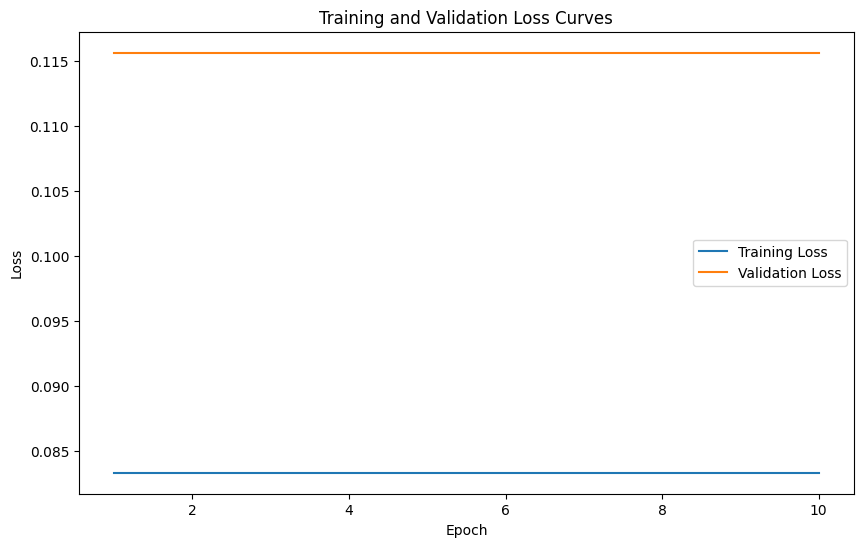

Logistic Regression Accuracy: 0.8844
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3689
           1       0.88      0.90      0.89      3811

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

Logistic Regression Confusion Matrix:
[[3208  481]
 [ 386 3425]]


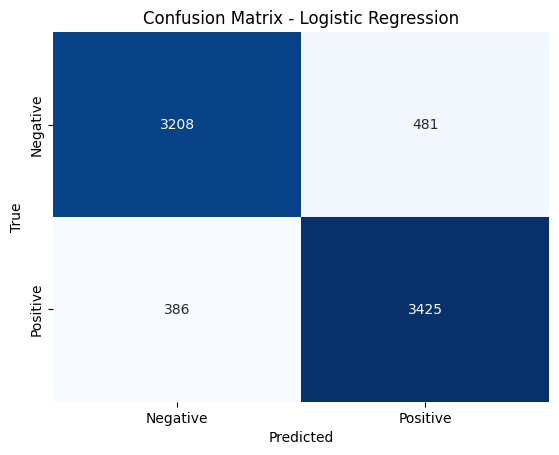

In [16]:
# Logistic Regression
lr_model = LogisticRegression()
plot_learning_curves(lr_model, X_text_train_tfidf, y_train, X_text_val_tfidf, y_val, epochs=10)
lr_model.fit(X_text_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_text_val_tfidf)
lr_accuracy = accuracy_score(y_val, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, lr_predictions))
lr_conf_matrix = confusion_matrix(y_val, lr_predictions)
print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

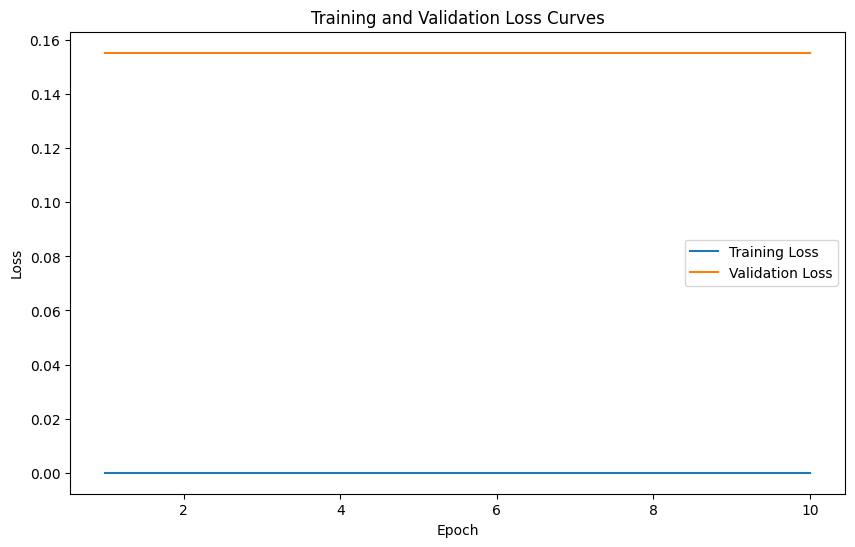

Random Forest Accuracy: 0.8446666666666667
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      3689
           1       0.86      0.83      0.85      3811

    accuracy                           0.84      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.84      0.84      0.84      7500

Random Forest Confusion Matrix:
[[3158  531]
 [ 634 3177]]


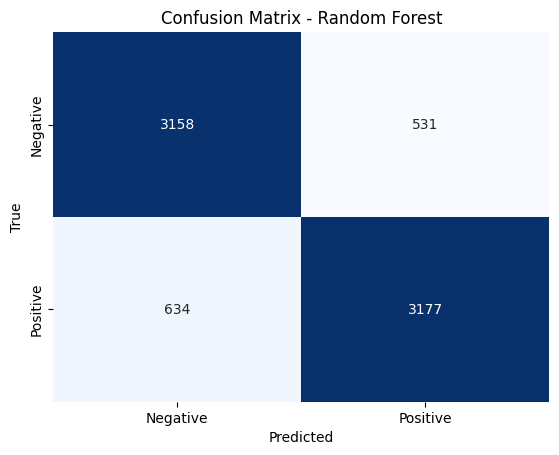

In [17]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
plot_learning_curves(rf_model, X_text_train_tfidf, y_train, X_text_val_tfidf, y_val, epochs=10)
rf_model.fit(X_text_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_text_val_tfidf)
rf_accuracy = accuracy_score(y_val, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_val, rf_predictions))
rf_conf_matrix = confusion_matrix(y_val, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Support Vector Machines Accuracy: 0.8906666666666667
Support Vector Machines Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3689
           1       0.88      0.90      0.89      3811

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

Support Vector Machines Confusion Matrix:
[[3236  453]
 [ 367 3444]]


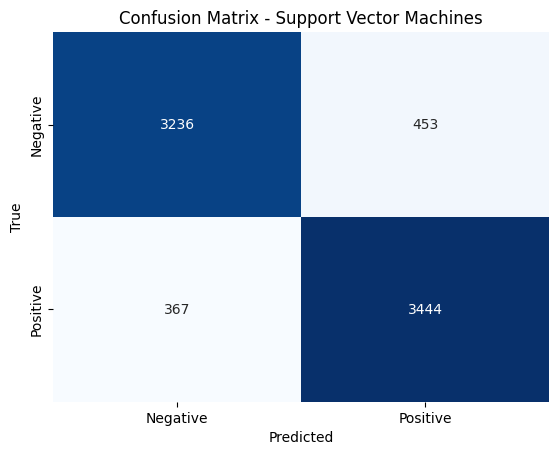

In [18]:
#Support Vector Machines
svm_model = SVC()
#plot_learning_curves(svm_model, X_text_train_tfidf, y_train, X_text_val_tfidf, y_val, epochs=10)
svm_model.fit(X_text_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_text_val_tfidf)
svm_accuracy = accuracy_score(y_val, svm_predictions)
print("Support Vector Machines Accuracy:", svm_accuracy)
print("Support Vector Machines Classification Report:")
print(classification_report(y_val, svm_predictions))
svm_conf_matrix = confusion_matrix(y_val, svm_predictions)
print("Support Vector Machines Confusion Matrix:")
print(svm_conf_matrix)
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Support Vector Machines')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
#testing on the custom review not present in the dataset
my_custom_review = "Movie was awful. I did not like it at all/"
preprocessed_review = preprocess_text(my_custom_review)

<ipython-input-6-de45c70e4e48>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [48]:
custom_review_tfidf = tfidf_vectorizer.transform([preprocessed_review])

In [49]:
nb_prediction = nb_model.predict(custom_review_tfidf)
svm_prediction = svm_model.predict(custom_review_tfidf)
rf_prediction = rf_model.predict(custom_review_tfidf)
lr_prediction = lr_model.predict(custom_review_tfidf)

In [50]:
sentiment_mapping = {0:'Negative', 1: 'Positive'}

In [51]:
nb_sentiment_label = sentiment_mapping.get(nb_prediction[0])
svm_sentiment_label = sentiment_mapping.get(svm_prediction[0])
rf_sentiment_label = sentiment_mapping.get(rf_prediction[0])
lr_sentiment_label = sentiment_mapping.get(lr_prediction[0])

In [52]:
print("Naive Bayes Prediction:", nb_sentiment_label)
print("SVM Prediction:", svm_sentiment_label)
print("Random Forest Prediction:", rf_sentiment_label)
print("Logistic Regression Prediction:", lr_sentiment_label)

Naive Bayes Prediction: Negative
SVM Prediction: Negative
Random Forest Prediction: Negative
Logistic Regression Prediction: Negative
